## Dataset load

In [54]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [55]:
def ImageSave(path, image_arr, file_name):
    image = Image.fromarray(image_arr)
    image.save(os.path.join(path, file_name))


In [56]:
PATH = '/root/scikit_learn_data'

data = []
type_path = os.path.join(PATH, 'test')
os.makedirs(type_path, exist_ok=True)

# image_save
for i, (image, label) in enumerate(zip(x_test, y_test)):
    filename = str(i) + '.jpg'
    ImageSave(type_path, image, filename)
    data.append([filename, label])

df = pd.DataFrame(data)  
df.to_csv(os.path.join(type_path, 'labels.csv'), index=False)

print('test done')

test done


In [59]:
PATH = '/root/scikit_learn_data'

data = []
type_path = os.path.join(PATH, 'train')
os.makedirs(type_path, exist_ok=True)

# image_save
for i, (image, label) in enumerate(zip(x_train, y_train)):
    filename = str(i) + '.jpg'
    ImageSave(type_path, image, filename)
    data.append([filename, label])
    
df = pd.DataFrame(data)   
df.to_csv(os.path.join(type_path, 'labels.csv'), index=False)
print('train done')

train done


784

# Scoring

In [8]:
import sklearn
from sklearn.metrics import accuracy_score

import pandas as pd
import random

label_path = '/root/scikit_learn_data/test/labels.csv'
labels = pd.read_csv(label_path)
labels = labels.loc[:,['1']]

pred_path = label_path
pred = pd.read_csv(pred_path)
pred = labels.loc[:,['1']]

acc = accuracy_score(pred, labels)
print(round(acc, 5))

1.0


# Train

In [60]:
import pandas as pd
df = pd.read_csv('/root/scikit_learn_data/train/labels.csv')
df.head()

,0,1
0,0.jpg,5
1,1.jpg,0
2,2.jpg,4
3,3.jpg,1
4,4.jpg,9


In [65]:
for k, v in df.values:
    print(k, v )
    break

print(type(k))
print(type(v))

0.jpg 5
<class 'str'>
<class 'int'>


# Inference

load data
(28, 28)


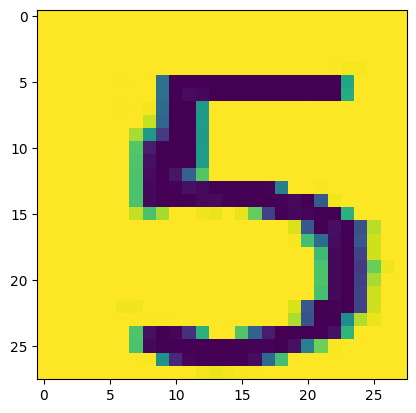

In [132]:
# 필요한 라이브러리들을 임포트합니다.
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image


# 데이터를 로드합니다.
print('load data')
#image = Image.open('')
image = Image.open('/root/test_img.JPG').convert("L")
image.thumbnail((28, 28),  Image.NEAREST)
image = image.resize((28, 28))
image = np.array(image)
#image = image.reshape(-1, 28, 28, 1)
plt.imshow(image)
print(image.shape)

In [133]:
image.shape

(28, 28)

In [ ]:
image = image.reshape(-1, 28, 28, 1)

# 모델을 로드합니다.
model = load_model('/root/mnist_model.h5')

# 입력 데이터를 [0, 1] 범위로 정규화합니다.
image = image.astype('float32') / 255.0

# 모델 요약
#print(model.summary())

In [73]:
image.shape

(1, 28, 28, 1)

In [76]:
# 모델 예측
print('모델 예측')
pred = model.predict(image)
pred = np.argmax(pred)

모델 예측
1/1 [==============================] - 0s 22ms/step


이 이미지는 7 입니다.


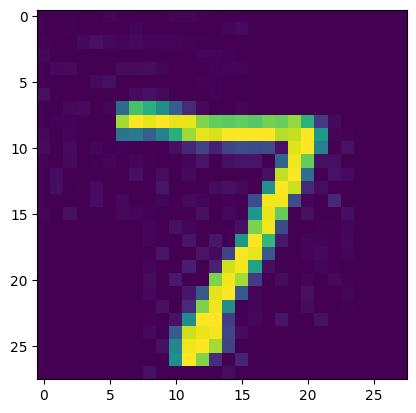

In [77]:
import matplotlib.pyplot as plt

img = plt.imread('/root/scikit_learn_data/test/0.jpg')
plt.imshow(img)
# 모델 추론 결과
print(f"이 이미지는 {pred} 입니다.")